### Machine Learning using MNIST Dataset
1. Dataset: https://www.kaggle.com/zalando-research/fashionmnist/data
---Download the dataset and upload the folder to your google drive
2. Problem statement:Clothes recognizing
3. Type of problem: Classification, Supervised
4. Data type: Images stored in csv file
5. Performance Measures: Accuracy, Precision, Recall, Confusion Matrix
6. Feature Importance: Not required
7. Interpretability: We can provide nearest neighbors of the query image to justify why image is classified as 'this'

In [ ]:
#Connect to your google drive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
#checking the available files
%cd /gdrive/My\ Drive/MNIST-fashion
!ls


/gdrive/My Drive/MNIST-fashion
fashion-mnist_test.csv	fashion-mnist_train.csv


### Classification Algorithms:
1. K-Nearest Neighbor
2. Logistic Regression (one-vs-rest)
3. SVM Classifier
4. Decision Tree
5. Random Forest
6. XGBoost

### Other Libraries:
1. GridsearchCV for hyperparameter tuning
2. randomsearchCV for hyperparameter tuning
3. Reference Link: https://stackoverflow.com/questions/57426633/what-is-randomsearchcv-and-gridsearchcv

#Data Visualization
1. Principal Component Analysis
2. t-SNE
- Reference Link: https://www.datacamp.com/community/tutorials/introduction-t-sne

#Import Library that going to require in this Tutorial

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import random

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from pactools.grid_search import GridSearchCVProgressBar

from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Read data from two files train.csv and test.csv
1. train.csv file contains images (28 x 28) representaed as rows (784 dimensional) and a label as digit
2. train.csv file contains images (28 x 28) representaed as rows (784 dimensional)
3. sample_submission.csv is the file which contains test image number and corresponding predicted digit 
   Soultion is submitted in sample_submission.csv file

In [ ]:
#%%timeit -n 10
# 10 loops, best of 3: 7.07 s per loop
mnist_train = pd.read_csv("fashion-mnist_train.csv")
mnist_test  = pd.read_csv("fashion-mnist_test.csv")

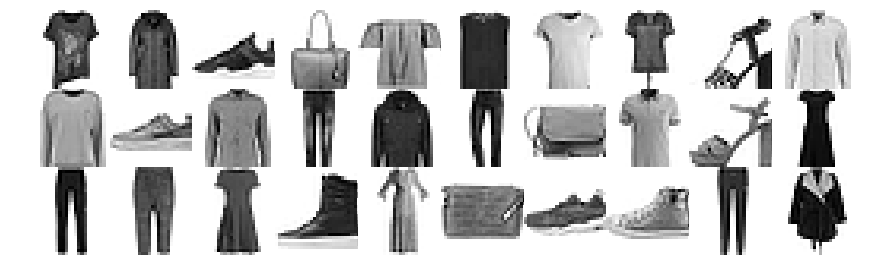

In [ ]:
# VISUALIZE DATA
samples = mnist_train.iloc[5000:5030,1:].values
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(samples[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [ ]:
mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(mnist_train.shape, mnist_test.shape)

((60000, 785), (10000, 785))


### Check whether data is balanced or imbalanced

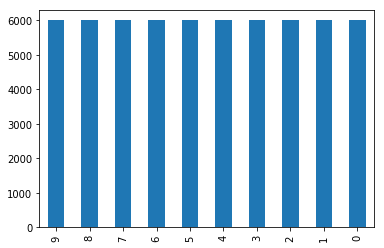

In [ ]:
#%%timeit
#345 ms
_ = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

In [ ]:
#%%time
#Wall time: 14.6 s
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

In [ ]:
#Data is being Scaled now to make it uniform
#%%time
# Wall time: 28.5 s
arr = X_raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


#Principal Component Analysis for data visualization

we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [ ]:
# %%timeit -n 3
# 3 loops, best of 3: 1.66 s per loop
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#924770', '#6DCBAC', '#93FDCA', '#34C2DA', '#D035D2', '#D2D6B8', '#A749F9', '#2904CD', '#854A96', '#53E8EB']


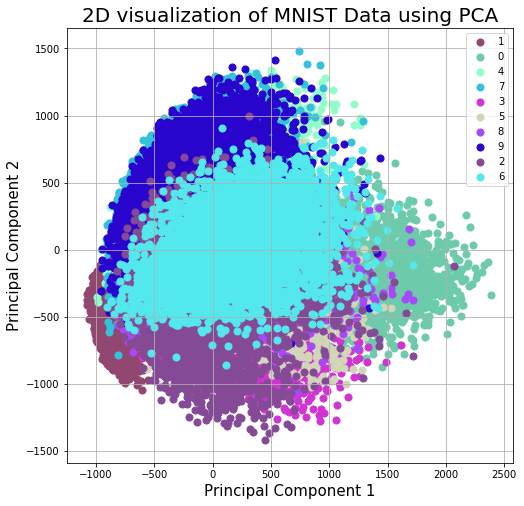

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)

targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


From above figure it is obvious conclusion is that data is not seperable. However this is not the case as PCA has some drawbacks.

# Next technique we try is t-SNE

In [ ]:
%%time
# Wall time: 1h 17min 10s
tsneData = TSNE(random_state=10).fit_transform(X)

In [ ]:
def ScatterPlotTsne(X,y):
    num_digits= len(np.unique(y))
    palette = np.array(sns.color_palette("hls", num_digits))
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(X[:,0], X[:,1], lw=0, s=40, c=palette[y.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts = []
    for i in range(num_digits):
        xtext, ytext = np.median(X[y == i, :], axis = 0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            path_effects.Stroke(linewidth=5, foreground="w"),
            path_effects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
ScatterPlotTsne(tsneData,y)

#### From above figure we can say data is seperable as seperate clusters are formed for each digit

#Divide data into 3 parts
1. Train - To calculate nearest neighbors
2. cross-validation: To find optimal value of k (Hyperparameter)
3. Test: To test final accuracy of the model

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

((36000, 784), (15000, 784), (9000, 784), (36000,), (15000,), (9000,))


# KNN Classifier

In [ ]:
def trainKNN(X_train, y_train, k): 
    """Function to train model using KNN classifier
    Takes argumenst as training dataset, k-value and returns classifier
    """
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [ ]:
def predictClassifier(X_test, classifier):
    """Function to predict labels using classifier
       Takes argumenst as test/cv dataset, and returns predicted values by model
    """
    y_pred = classifier.predict(X_test)
    return y_pred

In [ ]:
def calculateAccuracy(y_pred, y_test):
    """Function to check accuracy of the model. Takes input arguments as actual and predicted values
       and returns accuracy score
    """
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [ ]:
#%%time
# Wall time: 17min 52s
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)     

100%|██████████| 9/9 [17:51<00:00, 118.83s/it]


Wall time: 17min 52s


In [ ]:
AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9555555555555556,
 0.9517460317460318,
 0.947936507936508,
 0.9457142857142857,
 0.9442857142857143]

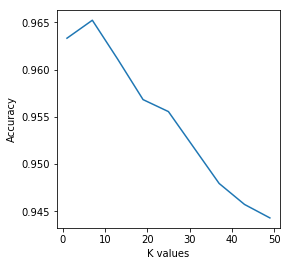

In [ ]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [ ]:
#%%time
# Wall time: 3min 49s
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

('Final Accuracy: ', 0.9406666666666667)
Wall time: 3min 49s


################# Confusion Matrix ####################


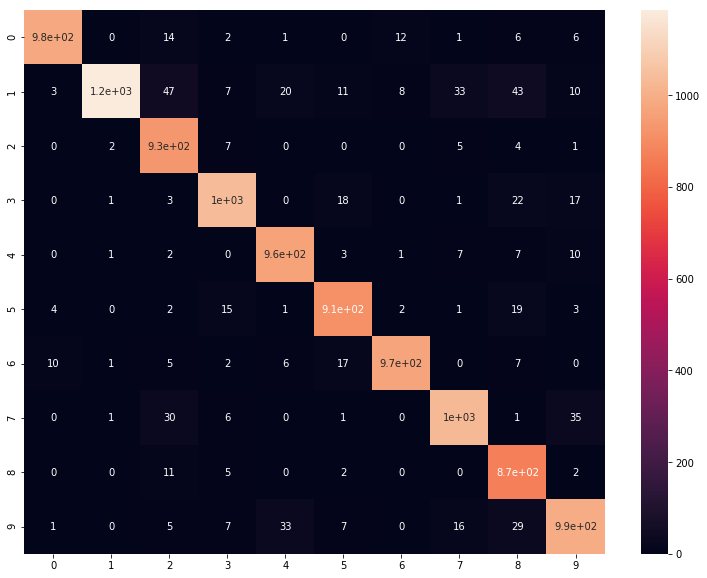

In [ ]:
num_digits= np.unique(y)
cf = confusion_matrix(y_pred,y_test, labels = num_digits )
print("################# Confusion Matrix ####################")
fig = plt.figure(figsize = (13,10))
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax); #annot=True to annotate cells


# SVM Classifier
GridSearch SVM Classifier One-vs-Rest

*   List item
*   List item


In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
%%time 
#Wall time: 8h 21min 8s
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_1, y_1)

CPU times: user 8h 44min 22s, sys: 8.01 s, total: 8h 44min 30s
Wall time: 8h 45min 35s


In [ ]:
svm_model.best_estimator_ 

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svm_model.best_score_

0.9580634920634921

In [ ]:
svm_model.cv_results_ 

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([260.90355101, 681.93191972, 129.78901763, 261.29173818,
        105.52576118, 131.28756318, 105.39877357, 108.07780185,
        112.20931163, 125.42438302, 166.75273962, 234.97747235]),
 'mean_score_time': array([ 93.40327959, 163.21239161,  56.95983992,  94.27920403,
         45.70829444,  57.5851666 ,  45.50176482,  46.14670396,
         42.701018  ,  41.90453553,  41.78323345,  41.87667642]),
 'mean_test_score': array([0.92765079, 0.88765079, 0.94688889, 0.92387302, 0.95806349,
        0.93819048, 0.95749206, 0.93980952, 0.92647619, 0.9152381 ,
        0.91019048, 0.90812698]),
 'mean_train_score': array([0.93200784, 0.88887292, 0.96046819, 0.92800784, 0.99191267,
        0.95099989, 0.99992063, 0.97454759, 0.983873  , 0.99475396,
        0.99888887, 0.99980951]),
 'param_C': masked_array(data=[1, 1, 10, 10, 100, 100, 1000, 1000, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, F

In [ ]:
%%time
#Wall time: 6min 14s
bestModel = svm_model.best_estimator_
bestModel.fit(X_train,y_train)
yPred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test,yPred)

CPU times: user 3min 1s, sys: 37.7 ms, total: 3min 1s
Wall time: 3min 2s


In [ ]:
print("svm accuracy = ",accuracy)

('svm accuracy = ', 0.9581904761904761)


#Logistic Regression

In [ ]:
#%time
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=2,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] penalty=l2, C=2.06981934682 .....................................
[CV]  penalty=l2, C=2.06981934682, score=0.848297007265, total= 2.2min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s
[CV] penalty=l2, C=2.06981934682 .....................................
[CV]  penalty=l2, C=2.06981934682, score=0.848533333333, total= 2.2min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.4min remaining:    0.0s
[CV] penalty=l2, C=2.06981934682 .....................................
[CV]  penalty=l2, C=2.06981934682, score=0.850303394012, total= 2.2min
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.6min remaining:    0.0s
[CV] penalty=l1, C=2.06981934682 .....................................
[CV]  penalty=l1, C=2.06981934682, score=0.847963740585, total= 6.1min
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
print(clf.best_estimator_)
print(clf.best_score_)
#0.8523111111111111

LogisticRegression(C=0.657042826511, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=2, penalty='l1',
          random_state=None, solver='saga', tol=0.001, verbose=0,
          warm_start=False)
0.8523111111111111


In [ ]:
%%time
# Wall time: 2min 50s
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

CPU times: user 7min 13s, sys: 155 ms, total: 7min 13s
Wall time: 7min 13s


In [ ]:
%%time
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)
#0.8548666666666667

0.8548666666666667
CPU times: user 181 ms, sys: 6.99 ms, total: 188 ms
Wall time: 130 ms


#Decision Tress Classifier

In [ ]:
%%time
# Wall time: 1min 54s
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████| 11/11 [00:59<00:00,  7.01s/it]

CPU times: user 59.5 s, sys: 55.7 ms, total: 59.6 s
Wall time: 59.7 s


In [ ]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097619047619048, 0.9556746031746032, 0.9851587301587301, 0.9958730158730159, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.7398412698412699, 0.813015873015873, 0.8433333333333334, 0.849047619047619, 0.856984126984127, 0.8520634920634921, 0.8455555555555555, 0.8463492063492063, 0.8482539682539683, 0.8473015873015873]


In [ ]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

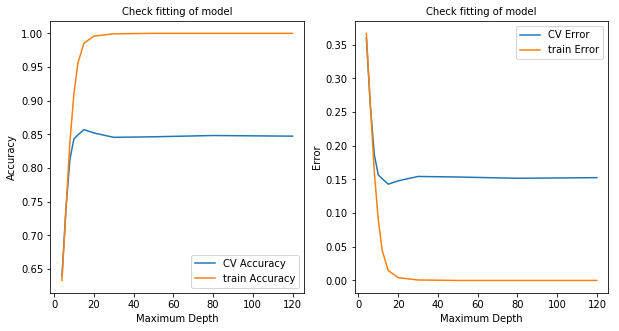

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [ ]:
clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)

print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

![Capture.PNG](attachment:Capture.PNG)

#Random Forest Classifier


In [ ]:
NoEstimators = [50,70,100,130,150,190,230,290,370,450,550,700]
trainAcc = []
CVAcc = []

In [ ]:
for est in tqdm(NoEstimators):
    clfRF = RandomForestClassifier(n_estimators=est, criterion='gini')
    clfRF.fit(X_train, y_train)
    y_predRFtrain = clfRF.predict(X_train)
    y_predRFcv = clfRF.predict(X_cv)
    accTr = accuracy_score(y_train, y_predRFtrain)
    accCv = accuracy_score(y_cv, y_predRFcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv) 

100%|██████████| 12/12 [35:16<00:00, 308.24s/it]


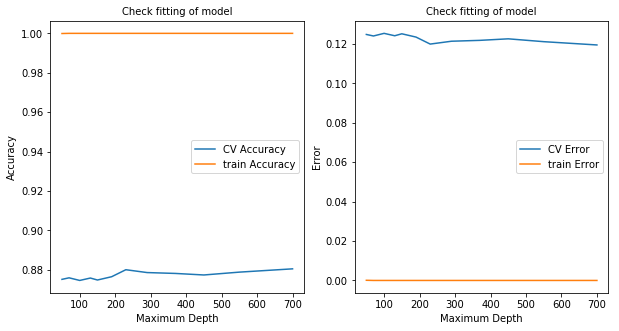

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,NoEstimators)

In [ ]:
maxAccuracy = max(CVAcc)
maxAccuracy
#0.8804444444444445(@700)

0.8804444444444445

In [ ]:
print(NoEstimators)
print(CVAcc)

[50, 70, 100, 130, 150, 190, 230, 290, 370, 450, 550, 700]
[0.8751111111111111, 0.8758888888888889, 0.8745555555555555, 0.8757777777777778, 0.8747777777777778, 0.8764444444444445, 0.88, 0.8785555555555555, 0.8781111111111111, 0.8773333333333333, 0.8787777777777778, 0.8804444444444445]


In [ ]:
clfRF = RandomForestClassifier(n_estimators=370, criterion='gini')
clfRF.fit(X_train, y_train)
y_predRF = clfRF.predict(X_test)
print("Final Accuracy RF: ",accuracy_score(y_test,y_predRF))
#0.8838

('Final Accuracy RF: ', 0.8838)


#XGBOOST

In [ ]:
!pip install xgboost

In [ ]:
etaVals = [0.1,0.3,0.5,0.6,0.8,0.9] # Shrinkage parameter as hyperparameter
#max_depth parameter we are changing as we know increasing this value may turn model into overfit
trainAcc = []
CVAcc = []
for e in etaVals:
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGtrain = model.predict(X_train)
    y_predXGcv = model.predict(X_cv)
    accTr = accuracy_score(y_train, y_predXGtrain)
    accCv = accuracy_score(y_cv, y_predXGcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)     

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,etaVals)

In [ ]:
def plotTestandTrainAccuracyAndError(TestAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,TestAcc,label='Test Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    
    trainError = [1-x for x in trainAcc]
    TestError    = [1-x for x in TestAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    
    plt.plot(maxDepth,TestError,label='Test Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

In [ ]:
TestAcc = []
for e in tqdm(etaVals):
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGTest = model.predict(X_test)
    accTest = accuracy_score(y_test, y_predXGTest)
    TestAcc.append(accTest)

plotTestandTrainAccuracyAndError(TestAcc,trainAcc,etaVals)

# Final Accuracies
    1. KNN                   0.94066  
    2. Logistic Regression   0.9125
    3. SVM                   0.95819
    4. Decision Tree         0.84923
    5. Random Forest         0.964
    6. XGBOOST               0.9325